# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from thermolib.thermodynamics.fep import BaseFreeEnergyProfile, plot_feps
from thermolib.thermodynamics.histogram import Histogram1D,plot_histograms
from thermolib.tools import read_wham_input
from thermolib.thermodynamics.bias import PlumedSplinePotential1D
from thermolib.thermodynamics.trajectory import ColVarReader
from thermolib.units import *

import numpy as np, matplotlib.pyplot as pp

# WHAM with an additional external potential

The additional external potential is added on top of each simulation specific potential and is defined as a spline-interpolated potential that is read from PLUMED file.

We first define the external potential

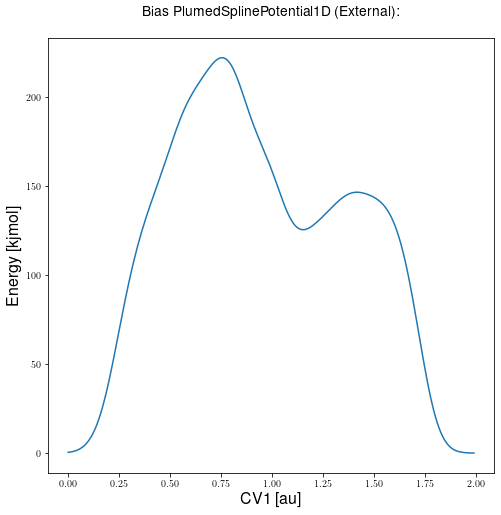

In [4]:
fn_spline = 'data/external.grid'
bias_spline = PlumedSplinePotential1D('External', fn_spline, inverse_cv=False, unit='kjmol', scale=1.0)
bias_spline.plot('ext_bias.png', np.arange(0.0,2.0,0.01))

Next we read all umbrellas and specify the above defined potential through the argument 'additional_bias' of the read_wham_input routine.

In [6]:
#read temperature and bias potentials from wham_input.txt file
fn = 'data/wham/wham_input.txt'
colvar_reader = ColVarReader([1], units=['au'], start=0, stride=10, end=-1, verbose=True)
temp, biasses, trajectories = read_wham_input(
    fn, 
    colvar_reader, trajectory_path_template='colvar_%s.dat', 
    bias_potential='Parabola1D', q01_unit='au', kappa1_unit='kjmol',
    additional_bias=bias_spline,
    verbose=True
)

Temperature set at 523.000000
Read 4001 trajectory samples for 1 CVs from data/wham/colvar_U1.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U1): K=500 kjmol  q0=6.000e-01 au
  PlumedSplinePotential1D (External): 

Read 4001 trajectory samples for 1 CVs from data/wham/colvar_U2.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U2): K=750 kjmol  q0=8.000e-01 au
  PlumedSplinePotential1D (External): 

Read 4001 trajectory samples for 1 CVs from data/wham/colvar_U3.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U3): K=750 kjmol  q0=1.000e+00 au
  PlumedSplinePotential1D (External): 

Read 4001 trajectory samples for 1 CVs from data/wham/colvar_U4.dat
Added bias MultipleBiasses1D (MultipleBias): MultipleBias:
  Parabola1D (U4): K=750 kjmol  q0=1.200e+00 au
  PlumedSplinePotential1D (External): 

Read 100 trajectory samples for 1 CVs from data/wham/colvar_U5.dat
Added bias MultipleBiasses1D (MultipleBias)

Now we perform WHAM and plot the results

In [7]:
bins = np.arange(0.0, 2.0, 0.02)
hist = Histogram1D.from_wham(bins, trajectories, biasses, temp, error_estimate='mle_f', Nscf=1000, convergence=1e-6, verbose=False)

The keyword verbose is depricated and will be removed in the near future. Use the keyword verbosity instead.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

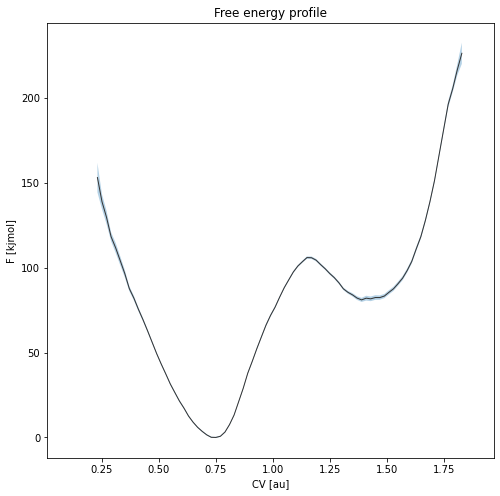

In [8]:
fep = BaseFreeEnergyProfile.from_histogram(hist, temp=temp)
fep.set_ref(ref='min')
fep.plot('fep.png')